<a href="https://colab.research.google.com/github/OliverMateusDS/Data-Science/blob/main/analise_vendas_anistia_ficticia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados de Vendas – Anistia Clothing (Base Fictícia)

Este notebook demonstra como realizar uma análise completa sobre os dados de vendas de uma loja de roupas.

Inclui análises de:
- Gastos por cliente
- Gastos por região
- Produtos mais vendidos
- Segmentação para programa de benefícios
- Gráficos de apoio


## 1. Leitura dos dados

In [43]:
import pandas as pd
import matplotlib.image as mpimg

logo_path = 'LOGO-A-1.png'
img = mpimg.imread(logo_path)

from google.colab import files
uploaded = files.upload()

caminho = next(iter(uploaded))
df_vendas = pd.read_excel(caminho, sheet_name='Vendas')
df_vendas.head()

Saving anistia_base_ficticia_com_canal.xlsx to anistia_base_ficticia_com_canal.xlsx


,DROP,Data da Venda,Status Pagamento,Nome do Comprador,Modelo,Cor,Estampa,Tamanho,Qtd,Preço,Frete,Guia Correios,NF,Região,Canal
0,DROP 1,02/01/2024,Pendente,Cliente 21,Modelo Estampa Y,Off-white,Estampa Y,GG,1,120,0,Rastreio5,NaN,Centro de SP,Site
1,DROP 2,02/01/2024,Pendente,Cliente 5,Modelo Estampa Y,Preta,Estampa X,GG,1,160,0,Rastreio6,NF10,Litoral de SP,Loja Física
2,DROP 1,03/01/2024,Faturado,Cliente 6,Modelo Estampa Y,Preta,Estampa Y,G,2,140,0,Rastreio5,NaN,Centro de SP,Loja Física
3,DROP 1,04/01/2024,Pendente,Cliente 8,Modelo Estampa Y,Preta,Estampa Y,G,1,120,0,NaN,NaN,Centro de SP,Site
4,DROP 1,04/01/2024,Faturado,Cliente 14,Modelo Estampa X,Off-white,Estampa Y,M,1,140,0,NaN,NF2,Litoral de SP,Site


## 2. Cálculo do valor total de cada venda

In [44]:
df_vendas['Valor Total'] = df_vendas['Preço'] * df_vendas['Qtd']
df_vendas[['Nome do Comprador', 'Modelo', 'Qtd', 'Preço', 'Valor Total']].head()

,Nome do Comprador,Modelo,Qtd,Preço,Valor Total
0,Cliente 21,Modelo Estampa Y,1,120,120
1,Cliente 5,Modelo Estampa Y,1,160,160
2,Cliente 6,Modelo Estampa Y,2,140,280
3,Cliente 8,Modelo Estampa Y,1,120,120
4,Cliente 14,Modelo Estampa X,1,140,140


## 3. Ranking de gastos por cliente

In [45]:
gasto_por_cliente = df_vendas.groupby('Nome do Comprador')['Valor Total'].sum().sort_values(ascending=False)
gasto_por_cliente

,Valor Total
Nome do Comprador,
Cliente 18,940
Cliente 13,900
Cliente 8,860
Cliente 21,700
Cliente 3,560
Cliente 6,560
Cliente 14,540
Cliente 10,420
Cliente 2,420


In [47]:
top_clientes = gasto_por_cliente.head(10)
print('Top 10 clientes por gasto:')
display(top_clientes)

Top 10 clientes por gasto:


,Valor Total
Nome do Comprador,
Cliente 18,940
Cliente 13,900
Cliente 8,860
Cliente 21,700
Cliente 3,560
Cliente 6,560
Cliente 14,540
Cliente 10,420
Cliente 2,420


## 4. Análise de gasto total por região

In [49]:
gasto_por_regiao = df_vendas.groupby('Região')['Valor Total'].sum().sort_values(ascending=False)
print('Gasto total por região:')
display(gasto_por_regiao)

Gasto total por região:


,Valor Total
Região,
Centro de SP,3740
Interior de SP,2520
Litoral de SP,1920


## 5. Produto mais vendido em quantidade

In [50]:
produto_mais_vendido = df_vendas.groupby('Modelo')['Qtd'].sum().sort_values(ascending=False)
print('Produtos mais vendidos (quantidade):')
display(produto_mais_vendido)

Produtos mais vendidos (quantidade):


,Qtd
Modelo,
Modelo Estampa Y,34
Modelo Estampa X,25


## 6. Segmentação de clientes para programa de benefícios

In [71]:
limites = gasto_por_cliente.quantile([0.33, 0.66])

def classificar_beneficio(valor):
    if valor > limites[0.66]:
        return 'Diamante'
    elif valor > limites[0.33]:
        return 'Ouro'
    else:
        return 'Prata'

df_segmentacao = gasto_por_cliente.reset_index().rename(columns={'Valor Total':'Gasto'})
df_segmentacao['Categoria'] = df_segmentacao['Gasto'].apply(classificar_beneficio)
display(df_segmentacao)

,Nome do Comprador,Gasto,Categoria
0,Cliente 18,940,Diamante
1,Cliente 13,900,Diamante
2,Cliente 8,860,Diamante
3,Cliente 21,700,Diamante
4,Cliente 3,560,Diamante
5,Cliente 6,560,Diamante
6,Cliente 14,540,Ouro
7,Cliente 10,420,Ouro
8,Cliente 2,420,Ouro
9,Cliente 20,420,Ouro


## 7. Analises de negocio

In [60]:
# 1. Clientes únicos
total_clientes = df_vendas['Nome do Comprador'].nunique()

# 2. Total vendas
total_vendas = len(df_vendas)

# 3. Faturamento total
total_faturado = df_vendas['Valor Total'].sum()

# 4. Ticket médio
ticket_medio = total_faturado / total_vendas

# 5. Total produtos vendidos
total_produtos = df_vendas['Qtd'].sum()

# 6. Frequência média de compras por cliente
frequencia_media = total_vendas / total_clientes

# 7. Recorrência: clientes que compraram mais de 1 vez
recorrentes = df_vendas['Nome do Comprador'].value_counts()
clientes_recorrentes = (recorrentes > 1).sum()
percent_recorrentes = 100 * clientes_recorrentes / total_clientes

# 8. Churn: clientes de compra única
clientes_1x = (recorrentes == 1).sum()
percent_1x = 100 * clientes_1x / total_clientes

# 9. Top 3 regiões em faturamento e volume
top_regioes_fat = df_vendas.groupby('Região')['Valor Total'].sum().sort_values(ascending=False).head(3)
top_regioes_qtd = df_vendas.groupby('Região')['Qtd'].sum().sort_values(ascending=False).head(3)

# 10. Top 20% clientes = quanto representam do faturamento
gasto_por_cliente = df_vendas.groupby('Nome do Comprador')['Valor Total'].sum().sort_values(ascending=False)
top20pct = int(0.2 * len(gasto_por_cliente))
fat_top20 = gasto_por_cliente.head(top20pct).sum()
percent_fat_top20 = 100 * fat_top20 / total_faturado

# 11. Evolução do faturamento ao longo dos meses
df_vendas['Data da Venda'] = pd.to_datetime(df_vendas['Data da Venda'], dayfirst=True, errors='coerce')
df_vendas['AnoMes'] = df_vendas['Data da Venda'].dt.to_period('M')
evolucao_mes = df_vendas.groupby('AnoMes')['Valor Total'].sum()

# 12. Faturamento por faixa de preço (faixas arbitrárias)
df_vendas['Faixa Preço'] = pd.cut(df_vendas['Preço'], bins=[0, 100, 140, 180, 10000], labels=['<100', '100-140', '140-180', '180+'])
fat_por_faixa = df_vendas.groupby('Faixa Preço')['Valor Total'].sum()

# Tabela-resumo dos indicadores principais
resumo = pd.DataFrame({
    'Indicador': [
        'Total de clientes únicos',
        'Total de vendas',
        'Total de produtos vendidos',
        'Faturamento total (R$)',
        'Ticket médio por venda (R$)',
        'Frequência média de compra por cliente',
        '% Clientes recorrentes (>1 compra)',
        '% Clientes de compra única (churn)',
        '% Faturamento vindo do top 20% clientes'
    ],
    'Valor': [
        total_clientes,
        total_vendas,
        total_produtos,
        f"{total_faturado:,.2f}",
        f"{ticket_medio:,.2f}",
        f"{frequencia_media:.2f}",
        f"{percent_recorrentes:.1f}%",
        f"{percent_1x:.1f}%",
        f"{percent_fat_top20:.1f}%"
    ]
})

from IPython.display import display
display(resumo)


/tmp/ipython-input-60-3181977751.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fat_por_faixa = df_vendas.groupby('Faixa Preço')['Valor Total'].sum()


,Indicador,Valor
0,Total de clientes únicos,17
1,Total de vendas,50
2,Total de produtos vendidos,59
3,Faturamento total (R$),"8,180.00"
4,Ticket médio por venda (R$),163.60
5,Frequência média de compra por cliente,2.94
6,% Clientes recorrentes (>1 compra),94.1%
7,% Clientes de compra única (churn),5.9%
8,% Faturamento vindo do top 20% clientes,33.0%


## DASHBOARD - ANISTIA

/tmp/ipython-input-67-3726580068.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.93])  # espaço para o logo acima


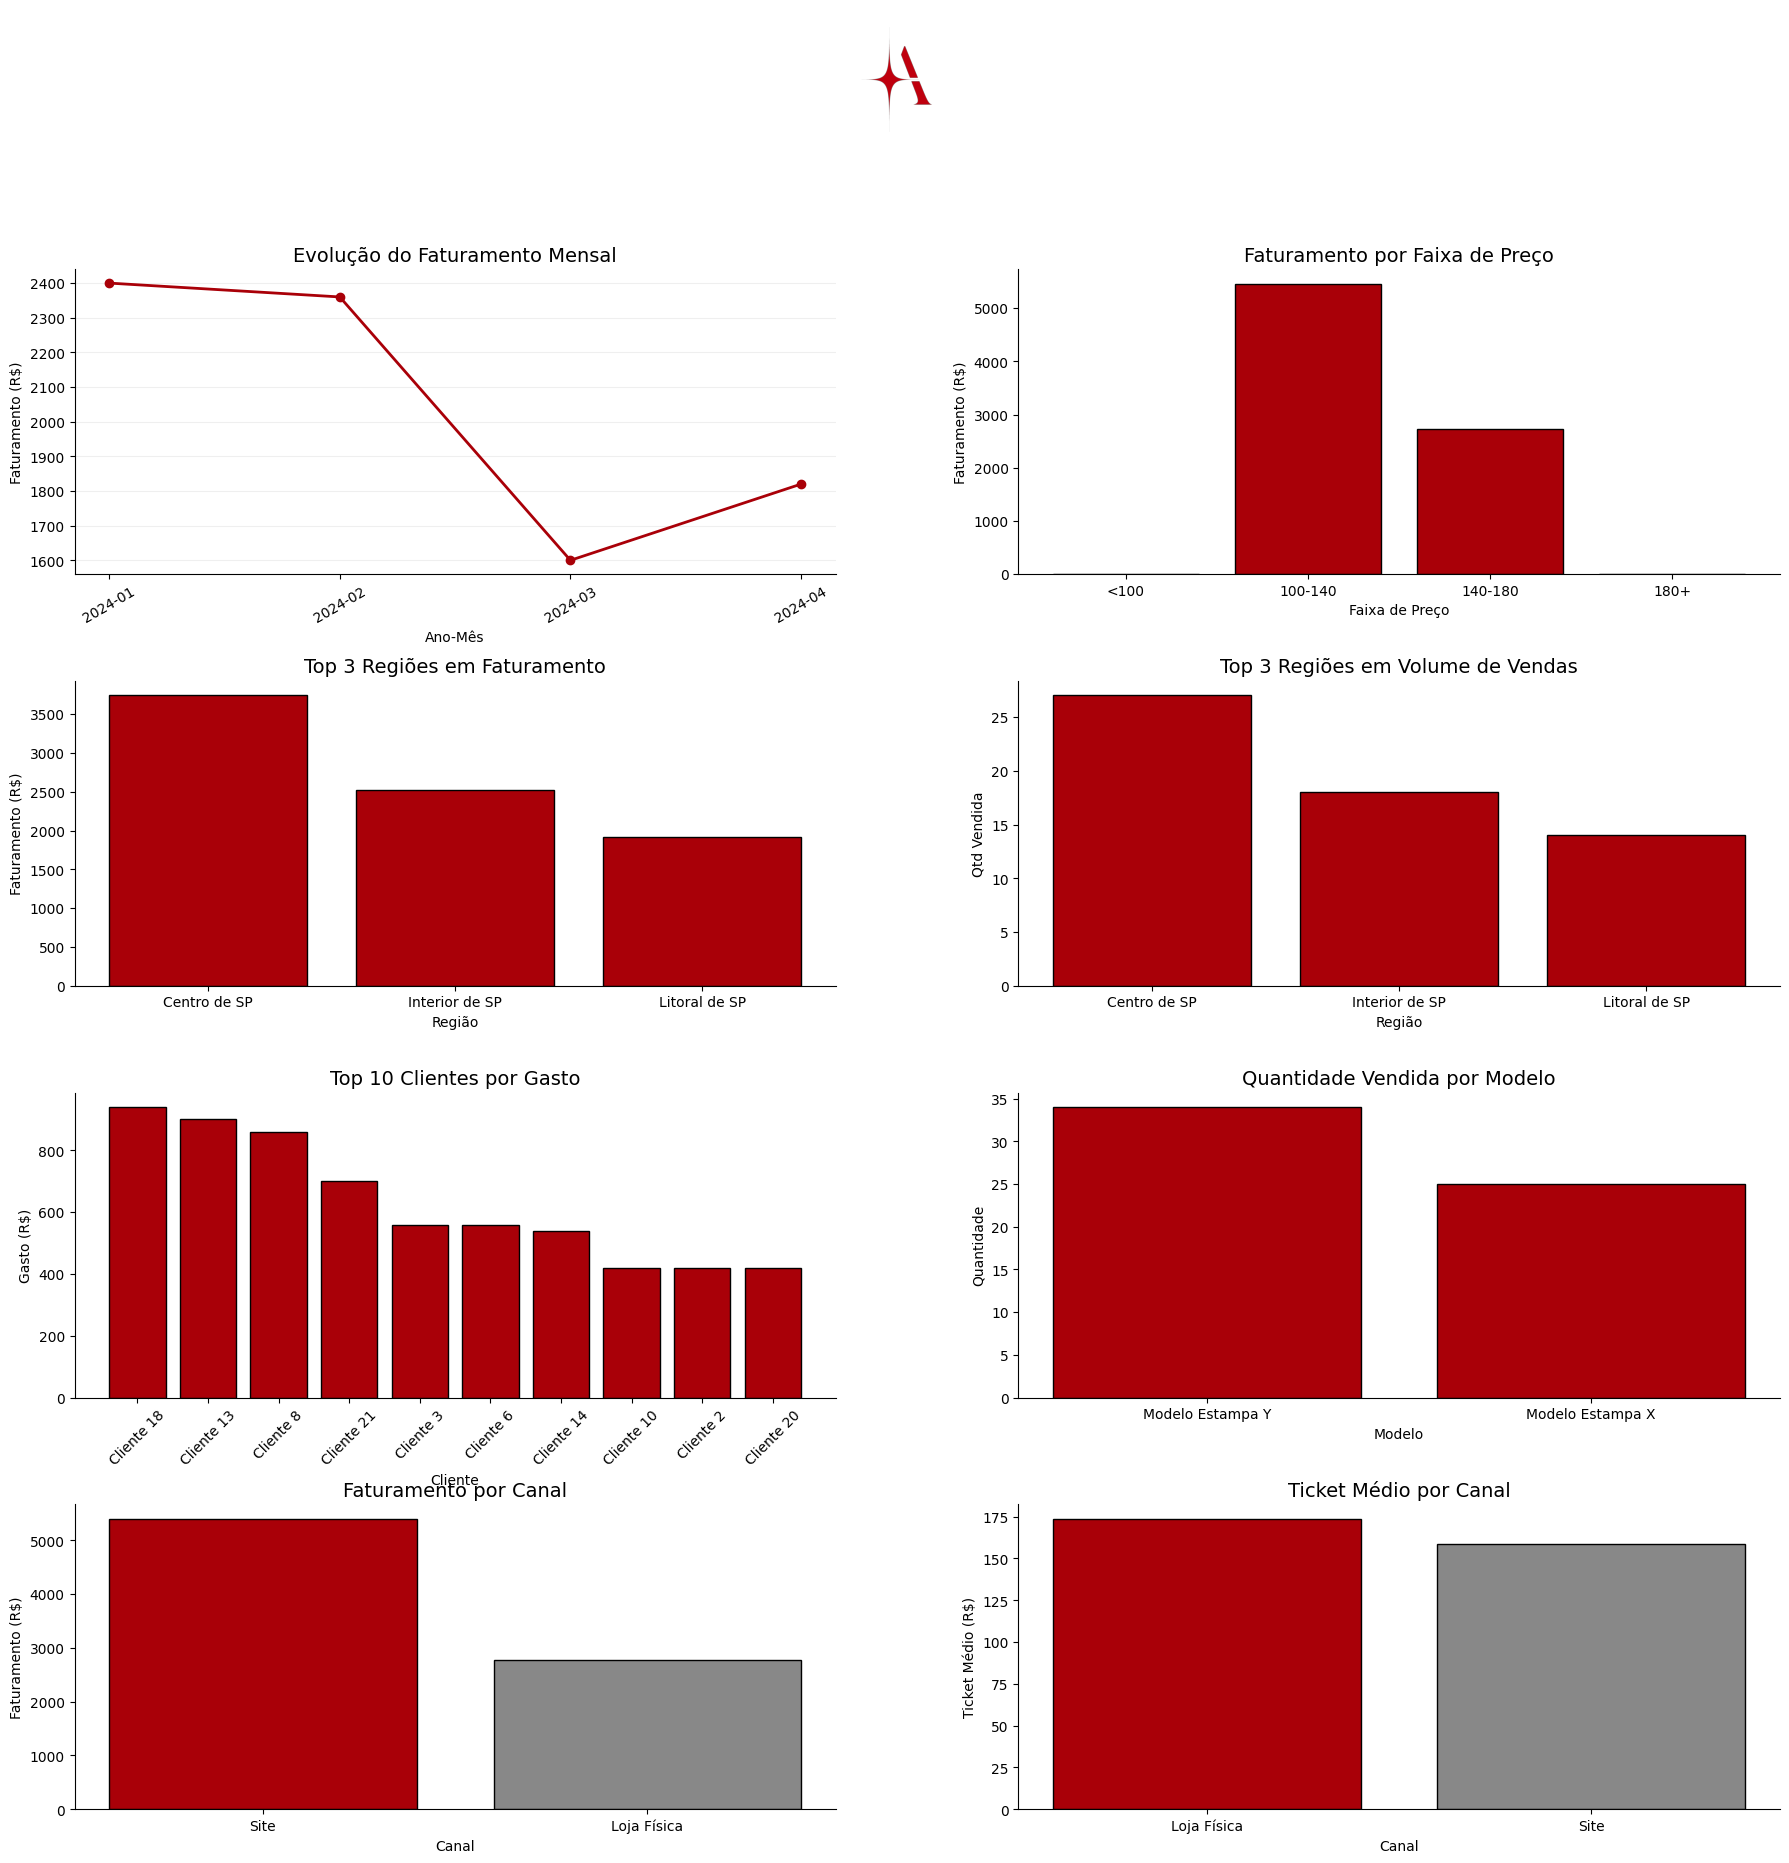

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('LOGO-A-1.png')
cores_pizza = ['#A90008', '#888888', '#cccccc']

fig, axs = plt.subplots(4, 2, figsize=(22, 20), facecolor='white', gridspec_kw={'hspace':0.35, 'wspace':0.24})

# LOGO centralizada no topo
logo_ax = fig.add_axes([0.42, 0.94, 0.16, 0.07], zorder=10)
logo_ax.imshow(img)
logo_ax.axis('off')

# 1. Evolução do faturamento mensal
axs[0,0].plot(evolucao_mes.index.astype(str), evolucao_mes.values, marker='o', color='#A90008', linewidth=2)
axs[0,0].set_title('Evolução do Faturamento Mensal', fontsize=14, color='black')
axs[0,0].set_ylabel('Faturamento (R$)', color='black')
axs[0,0].set_xlabel('Ano-Mês', color='black')
axs[0,0].grid(axis='y', alpha=0.2)
axs[0,0].set_facecolor('white')
axs[0,0].tick_params(axis='x', colors='black', rotation=30)
axs[0,0].tick_params(axis='y', colors='black')
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)

# 2. Faturamento por faixa de preço
axs[0,1].bar(fat_por_faixa.index.astype(str), fat_por_faixa.values, color='#A90008', edgecolor='black')
axs[0,1].set_title('Faturamento por Faixa de Preço', fontsize=14, color='black')
axs[0,1].set_ylabel('Faturamento (R$)', color='black')
axs[0,1].set_xlabel('Faixa de Preço', color='black')
axs[0,1].set_facecolor('white')
axs[0,1].tick_params(axis='x', colors='black')
axs[0,1].tick_params(axis='y', colors='black')
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)

# 3. Top 3 regiões em faturamento
axs[1,0].bar(top_regioes_fat.index, top_regioes_fat.values, color='#A90008', edgecolor='black')
axs[1,0].set_title('Top 3 Regiões em Faturamento', fontsize=14, color='black')
axs[1,0].set_ylabel('Faturamento (R$)', color='black')
axs[1,0].set_xlabel('Região', color='black')
axs[1,0].set_facecolor('white')
axs[1,0].tick_params(axis='x', colors='black')
axs[1,0].tick_params(axis='y', colors='black')
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)

# 4. Top 3 regiões em volume de vendas
axs[1,1].bar(top_regioes_qtd.index, top_regioes_qtd.values, color='#A90008', edgecolor='black')
axs[1,1].set_title('Top 3 Regiões em Volume de Vendas', fontsize=14, color='black')
axs[1,1].set_ylabel('Qtd Vendida', color='black')
axs[1,1].set_xlabel('Região', color='black')
axs[1,1].set_facecolor('white')
axs[1,1].tick_params(axis='x', colors='black')
axs[1,1].tick_params(axis='y', colors='black')
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)

# 5. Top 10 clientes por gasto
axs[2,0].bar(top_clientes.index, top_clientes.values, color='#A90008', edgecolor='black')
axs[2,0].set_title('Top 10 Clientes por Gasto', fontsize=14, color='black')
axs[2,0].set_facecolor('white')
axs[2,0].tick_params(axis='x', colors='black', rotation=45)
axs[2,0].tick_params(axis='y', colors='black')
axs[2,0].spines['top'].set_visible(False)
axs[2,0].spines['right'].set_visible(False)
axs[2,0].set_xlabel('Cliente', color='black')
axs[2,0].set_ylabel('Gasto (R$)', color='black')

# 6. Produto mais vendido
axs[2,1].bar(produto_mais_vendido.index, produto_mais_vendido.values, color='#A90008', edgecolor='black')
axs[2,1].set_title('Quantidade Vendida por Modelo', fontsize=14, color='black')
axs[2,1].set_facecolor('white')
axs[2,1].tick_params(axis='x', colors='black')
axs[2,1].tick_params(axis='y', colors='black')
axs[2,1].spines['top'].set_visible(False)
axs[2,1].spines['right'].set_visible(False)
axs[2,1].set_xlabel('Modelo', color='black')
axs[2,1].set_ylabel('Quantidade', color='black')

# 7. Faturamento por canal
axs[3,0].bar(faturamento_por_canal.index, faturamento_por_canal.values, color=['#A90008', '#888888'], edgecolor='black')
axs[3,0].set_title('Faturamento por Canal', fontsize=14, color='black')
axs[3,0].set_ylabel('Faturamento (R$)', color='black')
axs[3,0].set_xlabel('Canal', color='black')
axs[3,0].set_facecolor('white')
axs[3,0].tick_params(axis='x', colors='black')
axs[3,0].tick_params(axis='y', colors='black')
axs[3,0].spines['top'].set_visible(False)
axs[3,0].spines['right'].set_visible(False)

# 8. Ticket médio por canal
axs[3,1].bar(ticket_medio_canal.index, ticket_medio_canal.values, color=['#A90008', '#888888'], edgecolor='black')
axs[3,1].set_title('Ticket Médio por Canal', fontsize=14, color='black')
axs[3,1].set_ylabel('Ticket Médio (R$)', color='black')
axs[3,1].set_xlabel('Canal', color='black')
axs[3,1].set_facecolor('white')
axs[3,1].tick_params(axis='x', colors='black')
axs[3,1].tick_params(axis='y', colors='black')
axs[3,1].spines['top'].set_visible(False)
axs[3,1].spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.93])  # espaço para o logo acima
plt.show()

